In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from keras.utils import np_utils

from tqdm import trange

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18

Using TensorFlow backend.


In [2]:
param_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

In [3]:
X_val = np.load("../data/X_val.npy").reshape((10000,28,28))
Y_val = np.load("../data/Y_val.npy")

In [4]:
asdf = np.loadtxt("Jonas_guesses.dat")

In [5]:
idxs, actual, guessed = asdf.T

In [6]:
correct = actual == guessed
nr_guesses = len(correct)

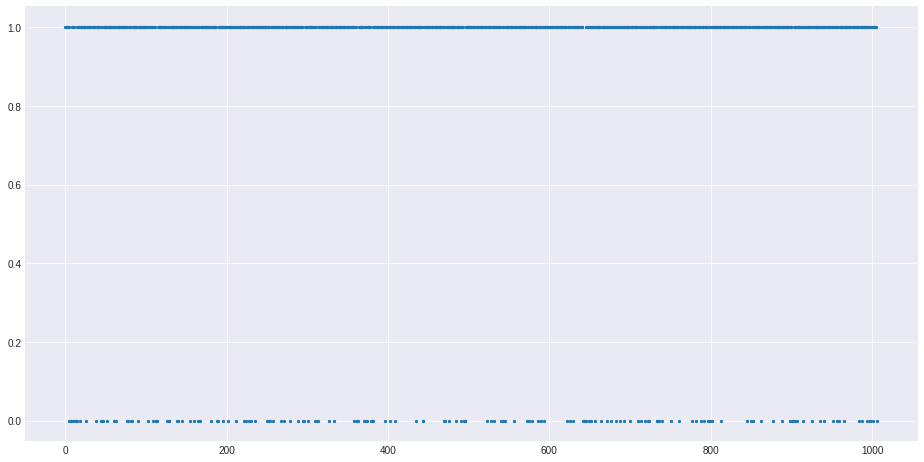

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(0, nr_guesses), correct, s=5)

In [8]:
cum_correct = np.zeros(nr_guesses-5)
for i in range(nr_guesses-5):
    cum_correct[i] = np.mean(correct[:i+5])

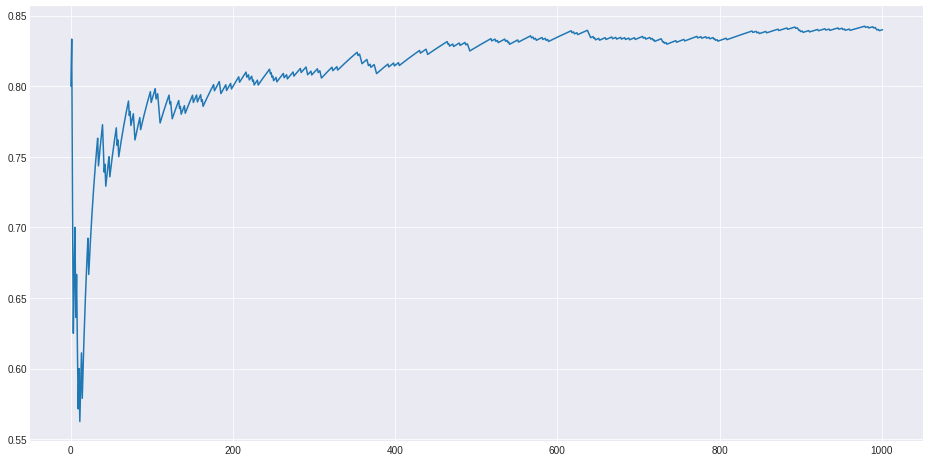

In [9]:
plt.figure(figsize=(16,8))
plt.plot(cum_correct)

In [10]:
window_size = 10
window_correct = np.zeros(nr_guesses-window_size)
for i in range(nr_guesses-window_size):
    window_correct[i] = np.mean(correct[i:i+window_size])

In [17]:
window_size = 50
df_correct = pd.DataFrame(correct)
window = df_correct.rolling(window_size, win_type="hamming", center=True, min_periods=0).mean()

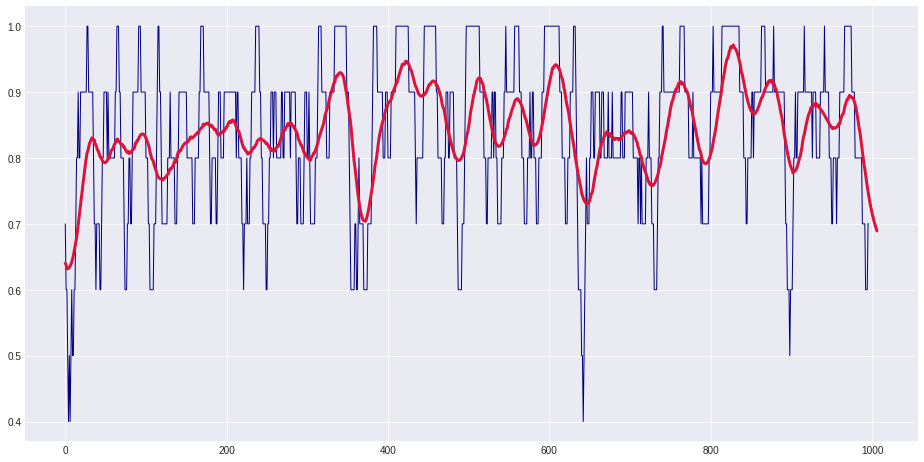

In [18]:
plt.figure(figsize=(16,8))
plt.plot(window_correct, c="navy", lw=1)
plt.plot(window, c="crimson", lw=3)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(actual, guessed, target_names=param_names))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.89      0.83       106
     Trouser       0.99      0.96      0.97        79
    Pullover       0.76      0.89      0.82       112
       Dress       0.80      0.89      0.84        99
        Coat       0.79      0.72      0.75       103
      Sandal       0.92      0.93      0.92        96
       Shirt       0.75      0.51      0.61       111
     Sneaker       0.85      0.95      0.90       115
         Bag       0.96      0.99      0.98        99
  Ankle boot       0.95      0.81      0.87        99

    accuracy                           0.85      1019
   macro avg       0.86      0.85      0.85      1019
weighted avg       0.85      0.85      0.84      1019

